# I) Read data

In [2]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv("yelp_2k.csv")
X = data[["review_id", "user_id", "business_id", "date", "text", "useful", "funny", "cool"]]
y = data[["stars"]]
print(X.head())
print(y.head())
y = np.ravel(y)

                review_id                 user_id             business_id  \
0  vVXQrmj6CArpQJkJQ_4fMQ  DgvO50NfNIEZeinKkCgORA  -XrG8PgkJ4XehqWOnV1-TA   
1  pkcT55BnL6JsZlz4H0CpBw  E7xztB1S0evVyjG38WSfow  tktorxzEnFYEXE5CkQTP4A   
2  z-GV4ZfqLGTjbVr2QfPj8A  G73QCz-7EOEKAyJ6cGnjkg  RSSZt1bcFHbvYYTI2he6lg   
3  BXrlwetTFhEMm3uq_cddsQ  gAcz_T0JKVmXDWkFehJigQ  VzSUgIOcyO7JmTwYDnyivQ   
4  Jh59oT1TdLzO_XPcfHzeRQ  emeP3q1wBsmZDa3ZkRC8ug  fKlr9qNoV37WQJwQ826POg   

         date                                               text  useful  \
0  2017-08-20  This car wash sucks.  Paid $40 for the Ultimat...       0   
1  2015-04-19  I was referred to Earnie by friends and since ...       0   
2  2017-08-14  The food is okay, but they have the worst serv...       0   
3  2012-02-06  Opting out from the noise and hustle of Flo's ...       7   
4  2015-07-19  Basically, unlimited steak. If you like steak,...       3   

   funny  cool  
0      0     0  
1      0     0  
2      0     0  
3      8    

# II) Text Preprocessing

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words_vectorisation(stop_words, max_doc_freq_thres):
    vectorizer = CountVectorizer(stop_words=stop_words, min_df=max_doc_freq_thres)
    bag_of_words = vectorizer.fit_transform(X["text"])
    bag_of_words = bag_of_words.todense()
    sum_of_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_of_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return vectorizer, bag_of_words, words_freq

def plot_bag_of_words_vectorisation(words_freq, stop_words=False):
    plot_list = [x[1] for x in words_freq]
    plt.xlabel('Word Rank')
    plt.ylabel('Word Count')
    if stop_words:
        plt.title('Word Frequency with stop words')
    else:
        plt.title('Word Frequency without stop words')
    plt.plot(plot_list, label="Counts")
    plt.legend()
    plt.yticks(np.arange(0, plot_list[0], step=plot_list[0]/10))
    plt.show()
    

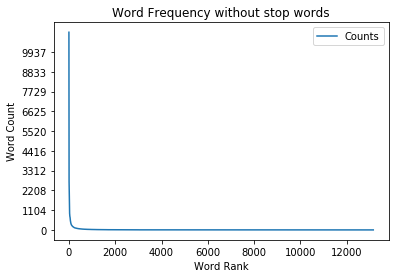

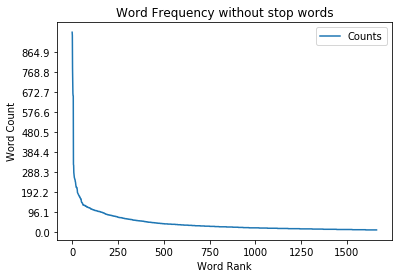

In [6]:
%matplotlib inline
import matplotlib.pylab as plt

# No stop words
vectorizer, bag_of_words, words_freq_no_stop_words = bag_of_words_vectorisation([], 0.)
plot_bag_of_words_vectorisation(words_freq_no_stop_words)

# With a list of stop words.
stop_words = ["the", "and", "to", "it", "was", "of", "for", "in", "my", "is", "that", "they", "this", "we", "you", "with", "on", "not", "have", "but", "had", "me", "at", "so", "were", "are", "be", "there", "as", "he", "if", "all", "when", "out", "would", "get", "our", "she", "back", "one", "up", "from", "very", "an", "just", "their", "here", "no", "will", "go", "about", "them", "or", "can", "what", "your", "us", "been", "do", "never", "because", "only", "don", "even", "after", "by", "which", "did", "got", "said", "more", "her", "really", "told", "also", "could", "some", "other", "then", "went", "ve", "over", "has", "well", "didn", "again", "first", "people", "who", "going", "came", "order", "make", "any", "know", "ordered", "day", "ever", "how", "asked", "off", "always", "too", "come", "his", "take", "took", "than", "before", "give", "new", "now", "want", "called", "definitely", "another", "say", "am", "still", "two", "down", "way", "right", "around", "last", "every", "wait", "him", "everything", "next", "being", "left", "see", "into", "where", "re", "sure", "while", "few", "should", "put", "something", "many", "ll", "look", "home", "10", "done", "need", "why", "through", "let", "most", "check", "think", "finally", "both", "wasn", "nothing", "same", "anything", "years", "hours", "these"]
vectorizer, bag_of_words, words_freq_with_stop_words = bag_of_words_vectorisation(stop_words, 10)
plot_bag_of_words_vectorisation(words_freq_with_stop_words)

# II) Text-Retrieval

In [8]:
from sklearn.neighbors import KNeighborsClassifier

#bag_of_words= np.squeeze(np.asarray(bag_of_words))
knn = KNeighborsClassifier(n_neighbors=5, metric="cosine")
knn.fit(bag_of_words, y)
horrible_service_vector = vectorizer.transform(["Horrible customer service"]).todense()
dist, ind = knn.kneighbors(horrible_service_vector, return_distance=True)

# Original reviews
for i, position in enumerate(ind[0]):
    print("Original text:") 
    print(X["text"][position][:200])
    print("Distance: " + str(dist[0][i]) + "\n")


Original text:
Rogers ...

1) is over priced
2) have horrible customer service
3) faulty and incorrect billing
4) poor customer service
5) not enough options
6) never arrive for an appointment
Distance: 0.25464400750007

Original text:
Horrible service, horrible customer service, and horrible quality of service!  Do not waste your time or money using this company for your pool needs.  Dan (602)363-8267 broke my pool filtration syste
Distance: 0.43408354158188966

Original text:
Service was horrible came with a major attitude. Payed 30 for lasagna and was no where worth it. Won't ever be going back and will NEVER recommend this place. was treated absolutely horrible. Horrible
Distance: 0.47018705717398246

Original text:
Went to Marca today to get a haircut and was given a great service both by front desk - customer service and by Georgia, girl who did my hair. I guess I got lucky with her as she has years of experien
Distance: 0.49748109237039395

Original text:
The service is horrible

Classification with Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def predict(classifier, X):
    threshold = 0.5
    predictions = classifier.predict_proba(X)
    result = np.zeros(len(X))
    for i in range(len(predictions)):
        if predictions[:, 1][i] > threshold:
            result[i] = 5
        else:
            result[i] = 1
    return result
    
def score(classifier, X, y):
    return sum(predict(classifier, X) == y) / float(len(X))

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size=0.9)
classifier = LogisticRegression(solver='lbfgs', multi_class='ovr')
classifier.fit(X_train, y_train)
train_accuracy = score(classifier, X_train, y_train)
print("train accuracy = " + str(train_accuracy))
test_accuracy = score(classifier, X_test, y_test)
print("test accuracy = " + str(test_accuracy))

train accuracy = 1.0
test accuracy = 0.8444444444444444


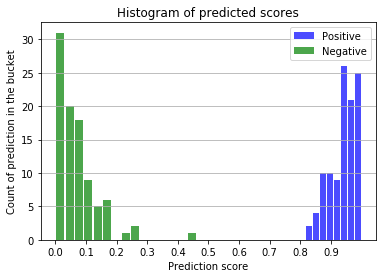

In [26]:
%matplotlib inline

positive_reviews_proba = classifier.predict_proba(X_train[y_train == 5])
negative_reviews_proba = classifier.predict_proba(X_train[y_train == 1])
plt.hist(x=positive_reviews_proba[:, 1], bins='auto', color='b', alpha=0.7, rwidth=0.85, label="Positive")
plt.hist(x=negative_reviews_proba[:, 1], bins='auto', color='g', alpha=0.7, rwidth=0.85, label="Negative")
plt.xlabel('Prediction score')
plt.ylabel('Count of prediction in the bucket')
plt.title('Histogram of predicted scores')
plt.grid(axis='y')
plt.xticks(np.arange(0, 1, step=0.1))
plt.legend()
plt.show()

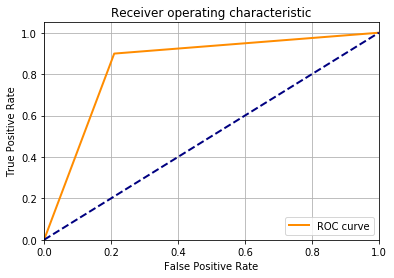

[0.         0.20948181 1.        ] [0.         0.89921613 1.        ] [6. 5. 1.]


In [27]:
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(y_test, predict(classifier, X_test), pos_label=5)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid(axis="both")
plt.show()
print(fpr, tpr, thresholds)